## Примеры решений

### Работает с кодом
* с таблицами
* с графиками

In [9]:
import pandas as pd
%matplotlib inline
import requests
from bs4 import BeautifulSoup

# Наглядная работа с кодом и таблицами

## В том числе больших размеров

In [10]:
channel1 = pd.read_csv('channel_1_data.txt', sep='\t')
channel1.head()

,tel,order,region,city,address
0,d76182a41a,dbd28-2a6,A,Сусуман,Кирова 10
1,d4d482c479,5f375-8c9,B,Якутск,Турку 3
2,113ab84955,b9ce9-caf,C,Пионерский,Лермонтовская 5
3,92bb06cf14,9bad8-af4,A,Владивосток,Красноармейская 7
4,41a27123c7,77c85-fd6,D,Донецк,Солнечный 8


## Группировка по столбцам

In [12]:
grouped = channel1.groupby('region').count()
grouped

,tel,order,city,address
region,,,,
A,9498,9498,9498,9498
B,11511,11511,11511,11511
C,4691,4691,4691,4691
D,4730,4730,4730,4730
E,13146,13146,13146,13146
F,18715,18715,18715,18715
G,9659,9659,9659,9659


## Быстрая визуализация данных

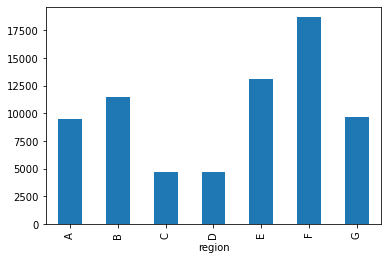

In [13]:
grouped['tel'].plot(kind='bar')

## Построение сводных таблиц

In [15]:
pivotTable = pd.pivot_table(channel1, index=['region', 'city'], aggfunc='count')
pivotTable

address  order  tel
region city                                          
A      Александровск-Сахалинский      225    225  225
       Биробиджан                     206    206  206
       Большой                        200    200  200
       Бор                            192    192  192
       Вешкайма                       210    210  210
...                                   ...    ...  ...
G      Чебоксары                      213    213  213
       Шемышейка                      233    233  233
       Шумерля                        196    196  196
       Якутск                         213    213  213
       Яранск                         206    206  206

[315 rows x 3 columns]

## Объединение данных из различных таблиц (аналог SQL JOIN)

In [17]:
channel2 = pd.read_csv('channel_2_data.txt', sep='\t')
channel2.head()

,tel,order
0,afb9d03f32,8db45-465
1,401547a015,8c245-07d
2,3b36ddc61f,4be87-3c2
3,3b36ddc61f,83cc2-028
4,3b36ddc61f,f1c0b-412


## Сколько строк во втором датасете

In [22]:
len(channel2)

340295

In [23]:
## Сколько строк в первом датасете

In [24]:
len(channel1)

71950

## Удаление дубликатов

In [25]:
channel1.drop_duplicates(subset='tel', keep='first', inplace=True)
channel2.drop_duplicates(subset='tel', keep='first', inplace=True)